In [1]:
from pyrootmemo.materials import MultipleRoots, Interface
from pyrootmemo.helpers import units, Parameter
from pyrootmemo.models import AxialPullout

from pint import Quantity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate some root data
if False:
    roots = MultipleRoots(
        species = "test_species",
        diameter = Parameter([1, 2, 1, 3, 4, 5, 6, 3], 'mm'),
        yield_strength = Parameter([20, 15, 20, 10, 5, 2.5, 10, 5], 'MPa'),
        tensile_strength = Parameter([40, 30, 40, 20, 10, 5, 20, 10], 'MPa'),
        elastic_modulus = Parameter([100, 100, 100, 100, 100, 100, 20, 100], 'MPa'),
        plastic_modulus = Parameter([50, 50, 50, 50, 50, 50, 10, 50], 'MPa'),
        length = Parameter([1, 1, 1, 1, 1, 1, 1, 1], 'm'),
        length_surface = Parameter([0, 0, 0.1, 0.1, 0, 0, 0.1, 0], 'm')
    )
else:
    roots = MultipleRoots(
        species = "test_species",
        diameter = Parameter([1], 'mm'),
        yield_strength = Parameter([20], 'MPa'),
        tensile_strength = Parameter([40], 'MPa'),
        elastic_modulus = Parameter([100], 'MPa'),
        plastic_modulus = Parameter([50], 'MPa'),
        length = Parameter([1], 'm'),
        length_surface = Parameter([0.1], 'm')
    )    
# interface data
interface = Interface(shear_strength = Parameter(10, "kPa"))

In [3]:
p = AxialPullout(
    roots, 
    interface, 
    surface = True,
    breakage = True,
    slipping = True,
    elastoplastic = True,
    weibull_shape = None
    )

['Not in tension' 'Anchored, elastic' 'Slipping, elastic' 'Full pullout'
 'Anchored, plastic' 'Slipping, plastic' 'Slipping, plastic'
 'Full pullout']
[[0.0] [79.99999999999999] [79.99999999999999] [79.99999999999999] [228.42712474619023] [539.2135623730951] [939.2135623730951]] millimeter
[[0.0] [15.707963267948966] [15.707963267948966] [15.707963267948966] [24.12011019108165] [15.707963267948966] [0.0]] newton
{'force': <Quantity([22.90912552], 'newton')>, 'behaviour_index': array([4]), 'survival_fraction': array([1.])}


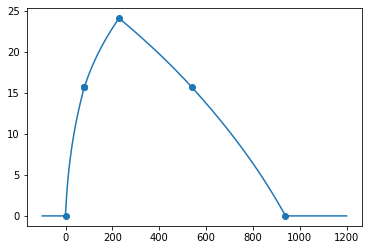

In [4]:
# print(p.coefficients)
# print(p.displacement_limits)
# print(p.displacement_limits.shape)
# print(p.behaviour_types)

# print(p.coefficients[0].shape)
# print(p.coefficients[0])
# print(p.coefficients[1])
# print(p.coefficients[2])
# print(p.coefficients[3])

print(p.behaviour_types)
# print(p.displacement_limits.shape)
print(p.displacement_limits)
# print(p.force_limits.shape)
print(p.force_limits)

disp = np.array(200) * units('mm')
print(p.calc_force(disp))

d = np.linspace(-100, 1200, 501) * units('mm')
f = Quantity.from_list([np.sum(p.calc_force(i)['force']) for i in d])
plt.plot(d.magnitude, f.magnitude)
plt.scatter(
    p.displacement_limits[:, 0].magnitude, 
    p.force_limits[:, 0].magnitude
)